# Books corpus topic model

In [3]:
import pandas as pd
import numpy as np

friends = pd.read_csv('../transcripts and metadata/friends_mastersheet.csv', index_col=0)
friends.head()

,Year_of_prod,Season,Episode Number,Episode_Title,Duration,Summary,Director,Stars,Votes,match,...,Phoebe,Ross,Rachel,Carol,Susan,Janice,Mike,Gunther,Ben,Emily
0,1994,1,1,The One Where Monica Gets a Roommate: The Pilot,22,"Monica and the gang introduce Rachel to the ""r...",James Burrows,8.3,7440,11,...,0.061248,0.144114,0.155643,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,1994,1,2,The One with the Sonogram at the End,22,Ross finds out his ex-wife is pregnant. Rachel...,James Burrows,8.1,4888,12,...,0.061500,0.248342,0.165269,0.088068,0.044696,0.000000,0.0,0.0,0.0,0.0
2,1994,1,3,The One with the Thumb,22,Monica becomes irritated when everyone likes h...,James Burrows,8.2,4605,13,...,0.145415,0.125624,0.102383,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,1994,1,4,The One with George Stephanopoulos,22,Joey and Chandler take Ross to a hockey game t...,James Burrows,8.1,4468,14,...,0.111161,0.151849,0.162042,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,1994,1,5,The One with the East German Laundry Detergent,22,"Eager to spend time with Rachel, Ross pretends...",Pamela Fryman,8.5,4438,15,...,0.095007,0.150061,0.141764,0.000000,0.000000,0.047483,0.0,0.0,0.0,0.0


In [4]:
np.mean(friends['len_prep'])

686.228813559322

## Some checks

In [5]:
# 5 least popular Friends episodes

check = friends.sort_values(by='Stars')

for i in range(5):
    row = check.iloc[i]
    episode = row['Episode Number']
    name = row['Episode_Title']
    season = row['Season']
    summary = row['Summary']
    stars = row['Stars']
    print(f'season {season} episode {episode} , "{name}" rating = {stars} stars: \n\n {summary}\n')

season 4 episode 21 , "The One with the Invitation" rating = 7.2 stars: 

 As Ross and Emily send out wedding invitations, he and Rachel each look back on their relationship together while Joey and Chandler look for a purpose in life.

season 6 episode 20 , "The One with Mac and C.H.E.E.S.E." rating = 7.4 stars: 

 Chandler forgets to write down a message for Joey when the time of his audition for the lead in a TV show is changed.

season 8 episode 19 , "The One with Joey's Interview" rating = 7.5 stars: 

 Joey prepares for his epic interview with Soap Opera Digest, reminiscing about his past acting experiences, his friends and his romantic life.

season 7 episode 21 , "The One with the Vows" rating = 7.5 stars: 

 Monica and Chandler are getting married in four weeks and have to write their vows, but neither has a clue what to say, so they reflect on their past.

season 9 episode 10 , "The One with Christmas in Tulsa" rating = 7.5 stars: 

 Chandler must spend Christmas in Tulsa, whi

In [6]:
# 5 most popular Friends episodes

check = friends.sort_values(by='Stars', ascending=False)

for i in range(5):
    row = check.iloc[i]
    episode = row['Episode Number']
    name = row['Episode_Title']
    season = row['Season']
    summary = row['Summary']
    stars = row['Stars']
    print(f'season {season} episode {episode} , "{name}" rating = {stars} stars: \n\n {summary}\n')

season 10 episode 18 , "The Last One: Part 2" rating = 9.7 stars: 

 Phoebe races Ross to the airport in a bid to stop Rachel from leaving for Paris. Monica and Chandler pack up their apartment ahead of their move to their new house, and Joey buys Chandler a new chick and duck as a leaving present.

season 5 episode 14 , "The One Where Everybody Finds Out" rating = 9.7 stars: 

 When Phoebe finds out about Monica and Chandler, she and Rachel attempt to get them to confess their relationship.

season 10 episode 17 , "The Last One: Part 1" rating = 9.5 stars: 

 Erica gives birth to the baby that Monica and Chandler are adopting. However, there's one small added surprise. Meanwhile, Ross and Rachel sleep together one last time before Rachel leaves ...                See full summary »

season 4 episode 12 , "The One with the Embryos" rating = 9.5 stars: 

 Phoebe's uterus is examined for implantation of the embryos. Meanwhile, a seemingly harmless game between Chandler and Joey against M

## prep

In [7]:
import glob
import random
RND = 12345
random.seed(RND)

class Chunker(object):
    def __init__(self, filenames, metadata, singles_only=False,
                 max_chars_per_book=None, chunk_size=None):
        
        # maximum number of characters to read from the beginning of each book:
        self.max_chars_per_book = max_chars_per_book
        
        # size of the chunks returned (in tokens):
        self.chunk_size = chunk_size
        
        # only return chunks from these files:
        self.filenames = filenames
        
        # include a dictionary with metadata:
        self.meta = meta
        
        # only return texts with a single genre label:
        self.singles_only = singles_only
        
        # only collect genres during the first iteration
        self.first = True

    def __iter__(self):
        if self.first:
            self.genres = []
        
        for filename in self.filenames:
            title = os.path.basename(filename)
            current_genres = self.meta[title]
            
            if self.singles_only:
                if len(current_genres) > 1:
                    continue

            with open(filename, 'r', encoding='utf-8') as f:
                try:
                    if self.max_chars_per_book:
                        text = f.read()
                        text = text[:self.max_chars_per_book]
                    else:
                        text = f.read()
                except:
                    continue
            
            tokens = text.split()
            
            for i in range(0, len(tokens), self.chunk_size):
                if self.first:
                    self.genres.append(current_genres)
                yield tokens[i:i + self.chunk_size]
                #this also helps for lazy loading because yield goes over it apart
        
        # stop collecting labels after first complete iteration
        self.first = False

In [25]:
n_features = 5000 # number of most common words
n_topics = 30 # number of topics
n_top_words = 60 # number of characteristic words per topic (viz purposes only)
max_df = 0.5 # maximum document frequency
min_df = 100 # minimum document frequency
max_books = 1000 # include all books (None), or a specific number
chunk_size = 686  # length of the average friends episode (after keeping only ADJ, NOUN & VERB)

In [26]:
path = '../../session-09-20220505T113620Z-001/session-09/hp_topic_model/books/books/*.txt'
filenames = sorted(list(glob.glob(path)))
print(len(filenames))

6800


In [27]:
random.seed(RND)
random.shuffle(filenames)
# print(filenames[:10])
# print(len(filenames))

In [28]:
import json
with open('../../session-09-20220505T113620Z-001/session-09/hp_topic_model/books_meta.json', 'r') as f:
    meta = json.loads(f.read())

# for book, genres in list(meta.items())[:20]:
#     print(f"{book} -> {' - '.join(sorted(genres))}")

## NMF

In [29]:
import os
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def identity(x):
    return x

chunks = Chunker(filenames, meta,
                 chunk_size=chunk_size,
                 max_chars_per_book=None)


vectorizer = TfidfVectorizer(max_df=max_df, min_df=min_df,
                             max_features=n_features,
                             analyzer=identity)
X = vectorizer.fit_transform(chunks)

from sklearn.decomposition import NMF
nmf = NMF(n_components=300,
          random_state=RND,
          verbose=1, max_iter=50).fit(X) # fit NMF model with TF-IDF feature


violation: 1.0
violation: 0.031139885354918503
violation: 0.07653054148533676
violation: 0.11354472302917008
violation: 0.13135412483719897
violation: 0.13425896060342254
violation: 0.1304850550958828
violation: 0.11770486573524326
violation: 0.09713547457928398
violation: 0.08143741061371203
violation: 0.06993458352690542
violation: 0.06021147966995215
violation: 0.05123587380296432
violation: 0.04235832095942571
violation: 0.03504204287923596
violation: 0.029009569102915037
violation: 0.024456500845704724
violation: 0.021382119485847232
violation: 0.018890061170217062
violation: 0.01687122266624416
violation: 0.015237613887276435
violation: 0.013839879534472738
violation: 0.012260163948462752
violation: 0.010977533954085164
violation: 0.009968562579638796
violation: 0.00917947167039685
violation: 0.008694941678385928
violation: 0.008397989351567966
violation: 0.008279199964980919
violation: 0.008228289644864271
violation: 0.008046499071513724
violation: 0.007997744899021874
violation

c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 50 reached. Increase it to improve convergence.
  warnings.warn(


TypeError: dump() missing 1 required positional argument: 'filename'

In [30]:
import joblib
joblib.dump(nmf, 'nmf_books_friends.sav')

['nmf_books_friends.sav']

In [31]:
for topic_idx, topic in enumerate(nmf.components_[:10]):
    top_idxs = np.argsort(topic)[::-1][:10]
    top_words = np.array(vectorizer.get_feature_names())[top_idxs]
    print(f'topic {topic_idx}:', ' - '.join(top_words))

topic 0: question - answer - ask - questions - answered - asking - answers - feeling - thinking - wondering
topic 1: air - sound - fear - breath - scream - throat - tried - panic - hear - lungs
topic 2: mouth - tongue - taste - teeth - throat - sucking - lip - opened - sucked - bite
topic 3: says - asks - looks - ask - nods - smiles - turns - replies - tells - adds
topic 4: father - died - study - proud - anger - born - taught - childhood - angry - learned
topic 5: mom - okay - honey - hug - sweetie - crazy - boyfriend - weird - driveway - cancer
topic 6: hell - damn - bastard - ass - damned - bitch - crap - pissed - fact - goddamn
topic 7: lot - big - nice - bit - getting - stuff - bad - liked - thinking - having
topic 8: ship - ships - vessel - cargo - fleet - port - space - hatch - board - engines
topic 9: men - moved - armed - faces - seen - guns - dozen - wounded - their - carried


c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [32]:
nmf.verbose = 1
X_ = nmf.transform(X)
print(X_.shape)

violation: 1.0
violation: 0.18986899875577293
violation: 0.10465565379056031
violation: 0.0178398516771986
violation: 0.005571748429768079
violation: 0.002139511926052231
violation: 0.0003835171593940411
violation: 0.00020764634272646355
violation: 5.4729036309917784e-05
Converged at iteration 10
(252493, 300)


In [33]:
from sklearn.feature_selection import f_classif

genres = [g[0] for g in chunks.genres]
feature_names = vectorizer.get_feature_names()

for genre in set(genres):
    print(f'-> genre {genre}:')
    y = [1 if g == genre else 0 for g in genres]
    # univariate feature selection with F-test for feature scoring
    F, pval = f_classif(X_, y)
    
    # indices of three best topics
    for topic_idx in np.argsort(F)[::-1][:3]:
        topic = np.nan_to_num(nmf.components_[topic_idx])
        words = [feature_names[i] for i in topic.argsort()[:-10:-1]]
        print('   ' + ' - '.join(words))

c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


-> genre Adventure:
   rifle - pistol - weapon - helicopter - fired - weapons - radio - target - bullets
   gaze - glanced - stared - expression - smile - stepped - lifted - narrowed - murmured
   lips - smile - pressed - lip - parted - cheeks - licked - finger - ear
-> genre Horror:
   zombies - zombie - undead - infected - bitten - flesh - virus - brains - skull
   dead - alive - bodies - killed - died - ghost - gone - corpse - bones
   gaze - glanced - stared - expression - smile - stepped - lifted - narrowed - murmured
-> genre Vampires:
   vampire - fangs - undead - stake - mortal - hunter - bite - neck - centuries
   vampires - humans - werewolves - undead - hunters - stake - supernatural - members - creatures
   blood - wound - fangs - red - bleeding - flesh - wounds - bloody - wrist
-> genre Themes:
   future - knowledge - different - history - person - nature - self - point - experience
   gaze - glanced - stared - expression - smile - stepped - lifted - narrowed - murmured
  

In [19]:
import pandas as pd
nmf.verbose = 0

texts = [value.split() for value in friends.text.values]

scores = nmf.transform(vectorizer.transform(texts))  # transform the HP chapters according to the fitted NMF model
scores.shape
# print(scores)

(236, 300)

In [20]:
df_scores = pd.DataFrame(scores, columns=[f't{i+1}' for i in range(scores.shape[1])])
friends2 = friends.join(df_scores)
friends2.head()

,Year_of_prod,Season,Episode Number,Episode_Title,Duration,Summary,Director,Stars,Votes,match,...,t291,t292,t293,t294,t295,t296,t297,t298,t299,t300
0,1994,1,1,The One Where Monica Gets a Roommate: The Pilot,22,"Monica and the gang introduce Rachel to the ""r...",James Burrows,8.3,7440,11,...,0.0,0.001308,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000811,0.007228
1,1994,1,2,The One with the Sonogram at the End,22,Ross finds out his ex-wife is pregnant. Rachel...,James Burrows,8.1,4888,12,...,0.0,0.000000,0.000377,0.000000,0.0,0.0,0.0,0.000000,0.000377,0.000000
2,1994,1,3,The One with the Thumb,22,Monica becomes irritated when everyone likes h...,James Burrows,8.2,4605,13,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,1994,1,4,The One with George Stephanopoulos,22,Joey and Chandler take Ross to a hockey game t...,James Burrows,8.1,4468,14,...,0.0,0.013545,0.000000,0.005333,0.0,0.0,0.0,0.000000,0.004276,0.000000
4,1994,1,5,The One with the East German Laundry Detergent,22,"Eager to spend time with Rachel, Ross pretends...",Pamela Fryman,8.5,4438,15,...,0.0,0.006093,0.000000,0.000464,0.0,0.0,0.0,0.000259,0.002814,0.000000


In [21]:
from operator import itemgetter
from scipy.stats import kendalltau

ranks = range(1, len(friends2.index)+1)
tau_scores = []
for col in [f't{i+1}' for i in range(scores.shape[1])]:
    tau, p = kendalltau(ranks, friends2[col].tolist())
    tau_scores.append((col, tau))
    
tau_scores.sort(key=itemgetter(1))
nb = 6
top, bottom = tau_scores[:nb], tau_scores[-nb:]
print(tau_scores[:10]) # print 10 topics with lowest Tau score

[('t156', -0.16165380866897655), ('t200', -0.1545603429182612), ('t240', -0.15076285897819725), ('t140', -0.1374889760761255), ('t245', -0.13579647279788934), ('t121', -0.13569458136377172), ('t123', -0.1347526285374056), ('t198', -0.13019134610251534), ('t251', -0.1266668624593103), ('t252', -0.10370471658580645)]


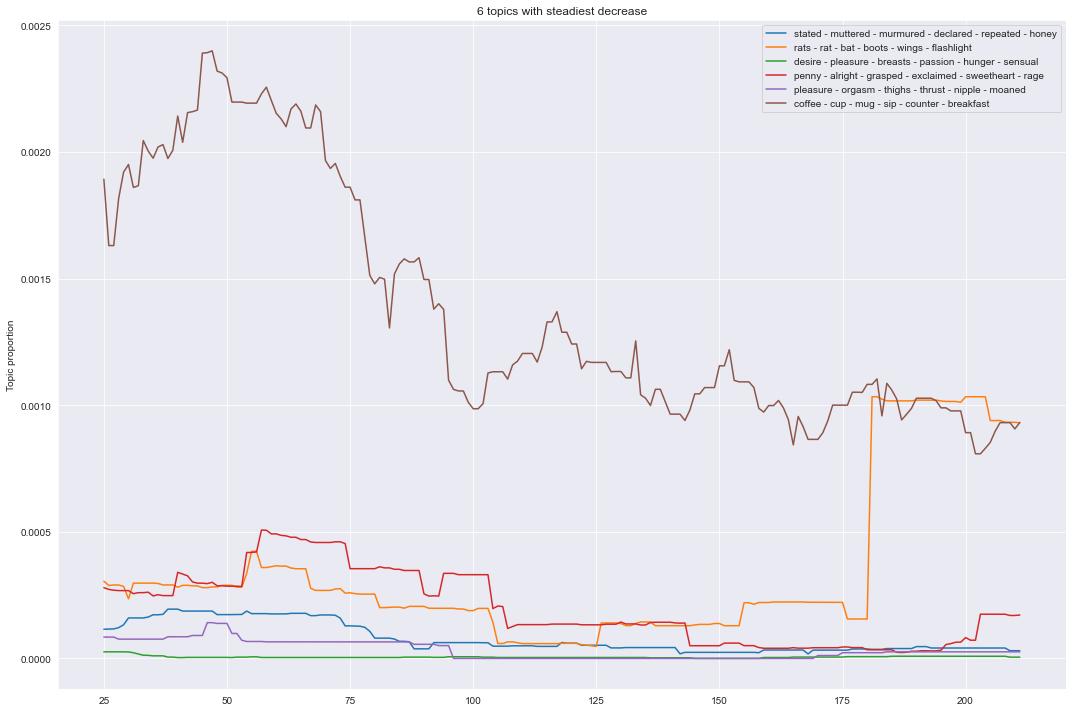

In [22]:
import matplotlib.pyplot as plt

import seaborn as sb
feature_names = vectorizer.get_feature_names_out()
fig = plt.figure(figsize=(15, 10))
sb.set_style("darkgrid")
for (feat, tau), col in zip(top, sb.color_palette("Set1")[:nb]):
    topic = nmf.components_[int(feat.replace('t', '')) - 1, :]
    words = [feature_names[i] for i in topic.argsort()[:-6-1:-1]]
    label = ' - '.join(words)
    friends2[feat].rolling(window=50, center=True).mean().plot(label=label)
plt.xlabel('', fontsize=10)
plt.ylabel('Topic proportion', fontsize=10)
plt.title(f'{nb} topics with steadiest decrease')
plt.tight_layout()
plt.legend();

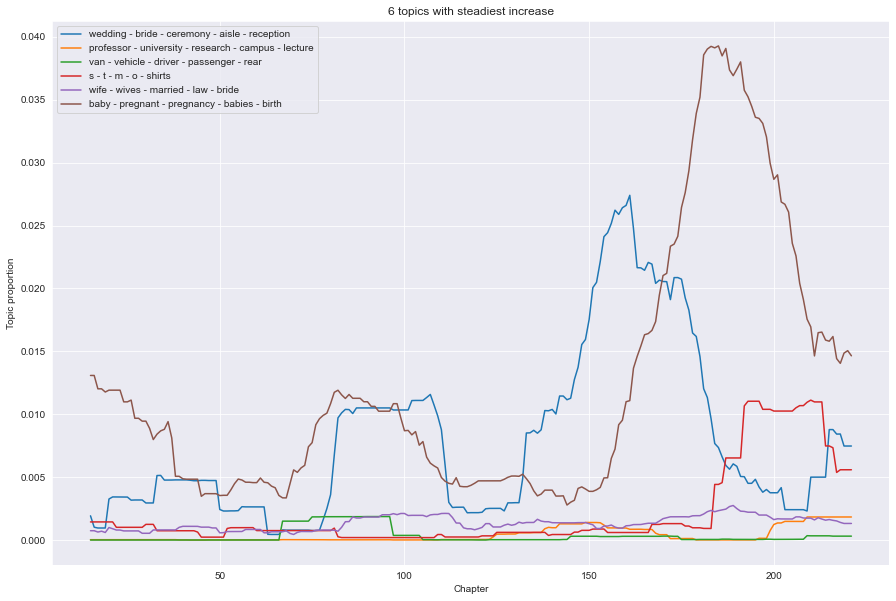

In [23]:
fig = plt.figure(figsize=(15, 10))
sb.set_style("darkgrid")
for (feat, tau), col in zip(bottom, sb.color_palette("Set1")[:nb]):
    topic = nmf.components_[int(feat.replace('t', '')) - 1, :]
    words = [feature_names[i] for i in topic.argsort()[:-5-1:-1]]
    label = ' - '.join(words)
    friends2[feat].rolling(window=30, center=True).mean().plot(label=label)
plt.xlabel('Chapter', fontsize=10)
plt.ylabel('Topic proportion', fontsize=10)
plt.title(f'{nb} topics with steadiest increase')
plt.legend();

In [24]:
#25 most predictive topics

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

feature_names = vectorizer.get_feature_names_out()
X = friends2.drop(columns=friends.columns.tolist())


y = friends2.Stars
# univariate feature selection with F-test for feature scoring
F, pval = f_regression(X, y)
    
    
for topic_idx in np.argsort(F)[::-1][:25]:
    topic = np.nan_to_num(nmf.components_[topic_idx])
    words = [feature_names[i] for i in topic.argsort()[:-10:-1]]
    print(f't{topic_idx}: ' + ' - '.join(words))

t260: plane - airport - flight - pilot - planes - jet - flying - fly - crash
t229: twins - twin - babies - pregnant - identical - pregnancy - born - tower - birth
t84: cody - frowns - race - roman - mobile - telephone - views - planes - grinned
t136: clan - chamber - courtyard - hall - leader - chief - land - leaders - herd
t164: summer - college - winter - candy - weekend - spring - month - spend - senior
t221: boss - company - assistant - contract - interview - suit - employees - employee - college
t30: author - writing - novel - write - writer - fiction - stories - published - characters
t47: beach - sand - ocean - waves - shore - vacation - shorts - swim - board
t227: store - counter - grocery - shopping - mall - stores - register - customers - parking
t159: camera - video - screen - cameras - tape - film - tv - studio - television
t110: river - bank - shore - current - banks - fish - mud - waters - west
t99: prison - prisoners - prisoner - jail - trial - gang - escape - bars - dru

### Predictions 
#### setting baseline

In [25]:
import numpy as np
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

X = friends2.drop(columns=friends.columns.tolist())
y = friends2.Stars

dummy_regr = DummyRegressor(strategy="mean")

scores = cross_val_score(dummy_regr, X, y, cv=10, scoring = 'neg_root_mean_squared_error')

print(np.mean(scores))


-0.3946868469935892


#### predictions with topics

In [26]:
#all features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

feature_names = vectorizer.get_feature_names_out()
X = friends2.drop(columns=friends.columns.tolist())
y = friends2.Stars

reg = LinearRegression()

scores = cross_val_score(reg, X, y, cv=10, scoring = 'neg_root_mean_squared_error')

print(np.mean(scores), np.std(scores))

-168785267634.5802 127441585465.53943


In [27]:
#25 best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

Best = [f't{topic_idx}' for topic_idx in np.argsort(F)[::-1][:25]]

feature_names = vectorizer.get_feature_names_out()
X = friends2[Best]
y = friends2.Stars

reg = LinearRegression()
scal = StandardScaler()

pipe = make_pipeline(reg, scal)

scores = cross_val_score(reg, X, y, cv=10, scoring = 'neg_root_mean_squared_error')

print(np.mean(scores), np.std(scores))

-0.4614957939830687 0.04056974650378721


In [28]:
#10 best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

Best = [f't{topic_idx}' for topic_idx in np.argsort(F)[::-1][:10]]

feature_names = vectorizer.get_feature_names_out()
Xble = friends2.drop(columns=friends.columns.tolist())
X = Xble[Best]
y = friends2.Stars

reg = LinearRegression()
scal = StandardScaler()

pipe = make_pipeline(reg, scal)

scores = cross_val_score(reg, X, y, cv=10, scoring = 'neg_root_mean_squared_error')

print(np.mean(scores), np.std(scores))

-0.4194487685914556 0.052396758313113995


In [32]:
Best = [f't{topic_idx}' for topic_idx in np.argsort(F)[::-1][:10]]
xtra = ['Year_of_prod', 'Votes', 'Duration']

cols = Best+xtra

cols.append('Stars')

scal = StandardScaler()

corrM = friends2[cols].corr()
 
corrM


,t260,t229,t84,t136,t164,t221,t30,t47,t227,t159,Year_of_prod,Votes,Duration,Stars
t260,1.000000,-0.032373,-0.033849,-0.051790,0.008305,0.059966,-0.074678,0.149145,0.016131,-0.019844,0.061369,-0.100354,-0.020806,-0.060883
t229,-0.032373,1.000000,-0.034273,0.018762,0.056593,-0.057698,0.017961,-0.035259,-0.047518,-0.043157,-0.080505,0.024162,-0.058802,-0.018253
t84,-0.033849,-0.034273,1.000000,-0.011527,-0.029453,-0.038423,-0.026220,0.084953,-0.055101,0.028558,-0.030762,0.050811,-0.029831,0.048243
t136,-0.051790,0.018762,-0.011527,1.000000,0.110852,-0.002671,-0.026905,-0.041531,-0.019128,0.221905,0.049393,0.021739,-0.030610,0.083991
t164,0.008305,0.056593,-0.029453,0.110852,1.000000,-0.067725,0.047955,-0.002137,0.118341,-0.016035,0.011394,-0.055467,-0.049909,-0.032466
t221,0.059966,-0.057698,-0.038423,-0.002671,-0.067725,1.000000,-0.022057,0.008690,-0.097072,-0.070136,0.084668,-0.107340,0.260708,-0.000776
t30,-0.074678,0.017961,-0.026220,-0.026905,0.047955,-0.022057,1.000000,-0.037909,0.010682,-0.027001,0.033819,-0.059496,-0.044233,-0.056105
t47,0.149145,-0.035259,0.084953,-0.041531,-0.002137,0.008690,-0.037909,1.000000,0.017259,0.011442,0.043256,0.006895,0.022485,0.017231
t227,0.016131,-0.047518,-0.055101,-0.019128,0.118341,-0.097072,0.010682,0.017259,1.000000,-0.049078,0.001980,0.052244,-0.055859,-0.015973
t159,-0.019844,-0.043157,0.028558,0.221905,-0.016035,-0.070136,-0.027001,0.011442,-0.049078,1.000000,0.112016,-0.064804,-0.029728,0.047803


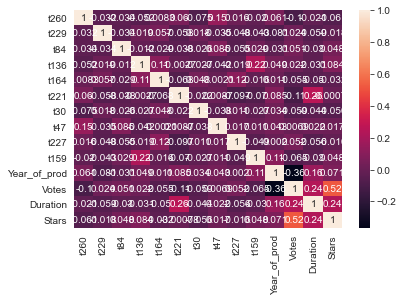

In [72]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(corrM, annot=True)
plt.show()

In [44]:
# print(friends2.Director.value_counts())

lst = ['Gary Halvorson',        
'Kevin Bright',          
'Michael Lembeck',       
'James Burrows',           
'Gail Mancuso',           
'Peter Bonerz',            
'David Schwimmer',         
'Ben Weiss']

def direr(wow):
    if wow not in lst:
        wow = wow.replace(wow,'Other')
    return wow

friends2['Director'] = friends2['Director'].apply(direr)

print(friends2.Director.value_counts())

Kevin Bright       54
Gary Halvorson     54
Other              43
Michael Lembeck    24
James Burrows      15
Gail Mancuso       14
Peter Bonerz       12
Ben Weiss          10
David Schwimmer    10
Name: Director, dtype: int64


In [64]:
Best = [f't{topic_idx}' for topic_idx in np.argsort(F)[1::-1]]
xtra = ['Year_of_prod', 'Duration', 'Director']

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

cols = Best+xtra

X = friends2[cols]
y = friends2.Stars

reg = LinearRegression()
hot = OneHotEncoder()
scal = StandardScaler()

categorical_features = X.select_dtypes(include="object").columns
integer_features = X.select_dtypes(exclude="object").columns

prep = make_column_transformer((hot, categorical_features),
                                (scal, integer_features))

pipe = make_pipeline(prep,reg)

scores = cross_val_score(pipe, X, y, cv=10, scoring = 'neg_root_mean_squared_error')

print(np.mean(scores), np.std(scores))

-0.4008638315308316 0.04835986385635539


In [65]:
Best = [f't{topic_idx}' for topic_idx in np.argsort(F)[::-1][:25]]
xtra = ['Year_of_prod', 'Duration', 'Director']

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

cols = Best+xtra

X = friends2[cols]
y = friends2.Stars

reg = LinearRegression()
hot = OneHotEncoder()
scal = StandardScaler()

categorical_features = X.select_dtypes(include="object").columns
integer_features = X.select_dtypes(exclude="object").columns

prep = make_column_transformer((hot, categorical_features),
                                (scal, integer_features))

pipe = make_pipeline(prep,reg)

scores = cross_val_score(pipe, X, y, cv=10, scoring = 'neg_root_mean_squared_error')

print(np.mean(scores), np.std(scores))

-0.4645101793031987 0.05817339521301511


In [66]:
Best = [f't{topic_idx}' for topic_idx in np.argsort(F)[::-1][:10]]
xtra = ['Year_of_prod', 'Duration', 'Director']

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

cols = Best+xtra

X = friends2[cols]
y = friends2.Stars

reg = LinearRegression()
hot = OneHotEncoder()
scal = StandardScaler()

categorical_features = X.select_dtypes(include="object").columns
integer_features = X.select_dtypes(exclude="object").columns

prep = make_column_transformer((hot, categorical_features),
                                (scal, integer_features))

pipe = make_pipeline(prep,reg)

scores = cross_val_score(pipe, X, y, cv=10, scoring = 'neg_root_mean_squared_error')

print(np.mean(scores), np.std(scores))

-0.42918556542695996 0.06242421122639609


In [31]:
# import joblib
# filename = 'nmf_books_friends.sav'
# joblib.dump(nmf, filename)

['nmf_books_friends.sav']

### SVR

In [56]:
from sklearn.svm import SVR

feature_names = vectorizer.get_feature_names_out()
X = friends2.drop(columns=friends.columns.tolist())
y = friends2.Stars

reg = SVR()
scal = StandardScaler()

pipe = make_pipeline(reg, scal)

scores = cross_val_score(reg, X, y, cv=10, scoring = 'neg_root_mean_squared_error')

print(np.mean(scores), np.std(scores))

-0.40677808528219295 0.059211925273978394


In [51]:
from sklearn.svm import SVR

Best = [f't{topic_idx}' for topic_idx in np.argsort(F)[::-1][:25]]

feature_names = vectorizer.get_feature_names_out()
X = friends2[Best]
y = friends2.Stars

reg = SVR()
scal = StandardScaler()

pipe = make_pipeline(reg, scal)

scores = cross_val_score(reg, X, y, cv=10, scoring = 'neg_root_mean_squared_error')

print(np.mean(scores), np.std(scores))

-0.4269642548856371 0.06804596026969317


In [78]:
Best = [f't{topic_idx}' for topic_idx in np.argsort(F)[::-1][:10]]

feature_names = vectorizer.get_feature_names_out()
X = friends2[Best]
y = friends2.Stars

reg = SVR()
scal = StandardScaler()

pipe = make_pipeline(reg, scal)

scores = cross_val_score(reg, X, y, cv=10, scoring = 'neg_root_mean_squared_error')

print(np.mean(scores), np.std(scores))

-0.41355260347536077 0.054011321600815024


In [79]:
Best = [f't{topic_idx}' for topic_idx in np.argsort(F)[1::-1]]
xtra = ['Year_of_prod', 'Duration', 'Director']

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

cols = Best+xtra

X = friends2[cols]
y = friends2.Stars

reg = SVR()
hot = OneHotEncoder()
scal = StandardScaler()

categorical_features = X.select_dtypes(include="object").columns
integer_features = X.select_dtypes(exclude="object").columns

prep = make_column_transformer((hot, categorical_features),
                                (scal, integer_features))

pipe = make_pipeline(prep,reg)

scores = cross_val_score(pipe, X, y, cv=10, scoring = 'neg_root_mean_squared_error')

print(np.mean(scores), np.std(scores))

-0.4229000071383643 0.06739912152089038


In [80]:
Best = [f't{topic_idx}' for topic_idx in np.argsort(F)[::-1][:25]]
xtra = ['Year_of_prod', 'Duration', 'Director']

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

cols = Best+xtra

X = friends2[cols]
y = friends2.Stars

reg = SVR()
hot = OneHotEncoder()
scal = StandardScaler()

categorical_features = X.select_dtypes(include="object").columns
integer_features = X.select_dtypes(exclude="object").columns

prep = make_column_transformer((hot, categorical_features),
                                (scal, integer_features))

pipe = make_pipeline(prep,reg)

scores = cross_val_score(pipe, X, y, cv=10, scoring = 'neg_root_mean_squared_error')

print(np.mean(scores), np.std(scores))

-0.4256167722242978 0.053832344041550656


In [81]:
Best = [f't{topic_idx}' for topic_idx in np.argsort(F)[::-1][:10]]
xtra = ['Year_of_prod', 'Duration', 'Director']

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

cols = Best+xtra

X = friends2[cols]
y = friends2.Stars

reg = SVR()
hot = OneHotEncoder()
scal = StandardScaler()

categorical_features = X.select_dtypes(include="object").columns
integer_features = X.select_dtypes(exclude="object").columns

prep = make_column_transformer((hot, categorical_features),
                                (scal, integer_features))

pipe = make_pipeline(prep,reg)

scores = cross_val_score(pipe, X, y, cv=10, scoring = 'neg_root_mean_squared_error')

print(np.mean(scores), np.std(scores))

-0.4243136464831898 0.051222479025645556


### gradient boosting

In [71]:
from sklearn.ensemble import GradientBoostingRegressor

feature_names = vectorizer.get_feature_names_out()
X = friends2.drop(columns=friends.columns.tolist())
y = friends2.Stars

reg = GradientBoostingRegressor()
scal = StandardScaler()

pipe = make_pipeline(reg, scal)

scores = cross_val_score(reg, X, y, cv=10, scoring = 'neg_root_mean_squared_error')

print(np.mean(scores), np.std(scores))

-0.4243307529303612 0.05454752391623509


In [72]:
Best = [f't{topic_idx}' for topic_idx in np.argsort(F)[::-1][:25]]

feature_names = vectorizer.get_feature_names_out()
X = friends2[Best]
y = friends2.Stars

reg = GradientBoostingRegressor()
scal = StandardScaler()

pipe = make_pipeline(reg, scal)

scores = cross_val_score(reg, X, y, cv=10, scoring = 'neg_root_mean_squared_error')

print(np.mean(scores), np.std(scores))

-0.4743865021548091 0.05309363102278743


In [73]:
Best = [f't{topic_idx}' for topic_idx in np.argsort(F)[::-1][:10]]

feature_names = vectorizer.get_feature_names_out()
X = friends2[Best]
y = friends2.Stars

reg = GradientBoostingRegressor()
scal = StandardScaler()

pipe = make_pipeline(reg, scal)

scores = cross_val_score(reg, X, y, cv=10, scoring = 'neg_root_mean_squared_error')

print(np.mean(scores), np.std(scores))

-0.4626873499655191 0.05295926483927544


In [82]:
Best = [f't{topic_idx}' for topic_idx in np.argsort(F)[1::-1]]
xtra = ['Year_of_prod', 'Duration', 'Director']

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

cols = Best+xtra

X = friends2[cols]
y = friends2.Stars

reg = GradientBoostingRegressor()
hot = OneHotEncoder()
scal = StandardScaler()

categorical_features = X.select_dtypes(include="object").columns
integer_features = X.select_dtypes(exclude="object").columns

prep = make_column_transformer((hot, categorical_features),
                                (scal, integer_features))

pipe = make_pipeline(prep,reg)

scores = cross_val_score(pipe, X, y, cv=10, scoring = 'neg_root_mean_squared_error')

print(np.mean(scores), np.std(scores))

-0.4519760133963449 0.09862278303568002


In [76]:
Best = [f't{topic_idx}' for topic_idx in np.argsort(F)[::-1][:25]]
xtra = ['Year_of_prod', 'Duration', 'Director']

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

cols = Best+xtra

X = friends2[cols]
y = friends2.Stars

reg = GradientBoostingRegressor()
hot = OneHotEncoder()
scal = StandardScaler()

categorical_features = X.select_dtypes(include="object").columns
integer_features = X.select_dtypes(exclude="object").columns

prep = make_column_transformer((hot, categorical_features),
                                (scal, integer_features))

pipe = make_pipeline(prep,reg)

scores = cross_val_score(pipe, X, y, cv=10, scoring = 'neg_root_mean_squared_error')

print(np.mean(scores), np.std(scores))

-0.4645101793031987 0.05817339521301511


In [77]:
Best = [f't{topic_idx}' for topic_idx in np.argsort(F)[::-1][:10]]
xtra = ['Year_of_prod', 'Duration', 'Director']

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

cols = Best+xtra

X = friends2[cols]
y = friends2.Stars

reg = GradientBoostingRegressor()
hot = OneHotEncoder()
scal = StandardScaler()

categorical_features = X.select_dtypes(include="object").columns
integer_features = X.select_dtypes(exclude="object").columns

prep = make_column_transformer((hot, categorical_features),
                                (scal, integer_features))

pipe = make_pipeline(prep,reg)

scores = cross_val_score(pipe, X, y, cv=10, scoring = 'neg_root_mean_squared_error')

print(np.mean(scores), np.std(scores))

-0.42918556542695996 0.06242421122639609
